# Diagramma di Hubble e modello cosmologico standard

In questo progetto viene analizzato il modello cosmologico standard "Lambda-cold-dark-matter" nell'ipotesi di universo piatto [inserire h(z)], esso fornisce una dettagliata descrizione dello stato attuale dell'Universo e dei processi evolutivi che l'hanno determinato. Tale modello è stato introdotto quando, studiando le supernovae Ia ad alto redishift si osservò che l'universo si stava espandendo, ma ad una velocità crescente. In esso viene utilizzata la costante cosmologica (Omega_lambda) come elemento fondamentale che provoca l'accelerazione ed essa assume i connotati di energia oscura.
Per poter stimare i parametri H0, (Omega_lambda) ed (Omega_m), che rappresentano rispettivamente la costante di Hubble, la densità di energia e materia oscura e la densità di materia conosciuta, è stato effettuato il fit sulla seguente relazione:
[25 + 5 LOG(dl(z))]

-dove z è il redshift, ovvero lo spostamento della lunghezza d'onda, della luce emessa dall'oggetto astronomico osservato, verso il rosso. Esso è causato dell'espansione dell'universo;

-dl(z) rappresenta la distanza di luminosità, essa viene definita operativamente attraverso la misura del flusso di energia f = [formula], ovvero il raggio della superficie sferica su cui si distribuisce la luce emessa dalla supernova.
A causa dell'effetto redshift si ha che il flusso dipende da z, f = [inserire formula con redshift]. 
Di conseguenza si ottiene che dl = dc * (1 + z) dove dc è detta distanza comovente. Nel caso di un universo piatto la distanza comovente è pari a: 

[inserire form. distanza comovente]


-mu(z) è detto modulo di distanza, definito dalla differenza tra la magnitudine assoluta M e apparente m. La magnitudine apparente m è la misura del flusso di un oggetto celeste confrontato con un oggetto di riferimento.

$m-m0 =

La magnitudine assoluta M, invece, viene misurata ponendo che gli oggetti si trovino ad una distanza fissa di 10pc, per cui è indipendente dalla distanza.

M - M0 =

Secondo la legge di Hubble, per piccole distanze esiste una relazione lineare tra il redshift e il modulo di distanza. H0 è la costante di Hubble, ed essa rappresenta come scala la velocità di espansione dell'universo al variare della distanza degli oggetti astronomici osservati.

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.special as sc  
from scipy.optimize import curve_fit
from iminuit.cost import LeastSquares
from iminuit import Minuit

di seguito sono riportati la tabella e il grafico dei dati sperimentali:

In [40]:
df = pd.read_csv('dati.csv')
df

,nome_SN,redshift,mod_dist,mod_dist_err,unknown
0,1993ah,0.028488,35.346583,0.223906,0.128419
1,1993ag,0.050043,36.682368,0.166829,0.128419
2,1993o,0.052926,36.817691,0.155756,0.128419
3,1993b,0.070086,37.446737,0.158467,0.128419
4,1992bs,0.062668,37.483409,0.156099,0.128419
...,...,...,...,...,...
575,D-000,1.017000,44.293971,0.171046,0.000015
576,D-006,1.315000,44.971358,0.187509,0.551672
577,P-009,0.821000,43.640939,0.194014,0.551672
578,R-012,1.215000,45.246521,0.560317,0.000148


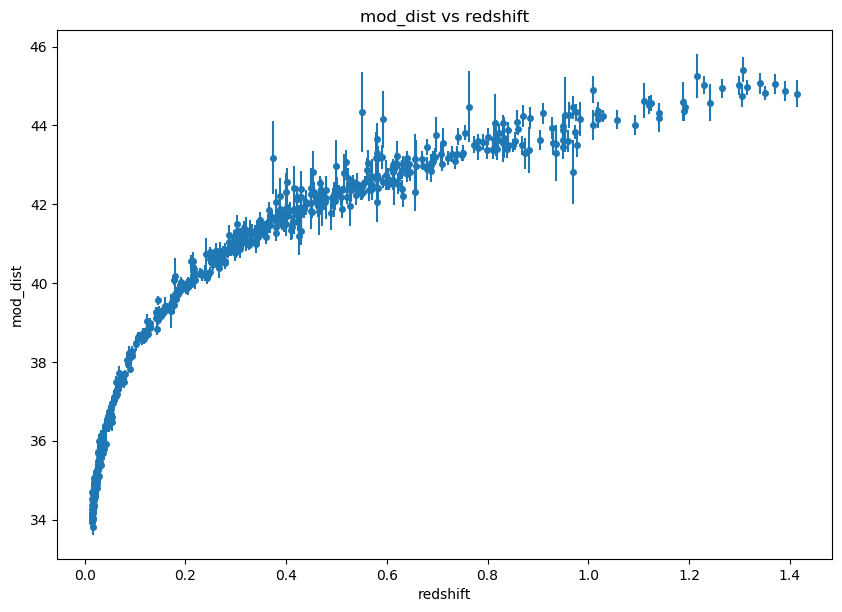

In [42]:
fig, ax = plt.subplots(figsize=(10, 7), dpi=100)
plt.title('mod_dist vs redshift')
ax.errorbar(df.redshift, df.mod_dist, xerr = 0, yerr=df.mod_dist_err, marker='o', markersize=4, linestyle='')
ax.set_xlabel('redshift')
ax.set_ylabel('mod_dist')
plt.show()

 I metodo, CURVE FIT con scipy 

In [44]:
# definisco le funzioni ipergeometriche:
def geom_1(B):
    return sc.hyp2f1(1/6,1/2,7/6, (B - 1)/B)
def geom_2(B,z):
    return sc.hyp2f1(1/6,1/2,7/6, ((B - 1)/B) * (1 + z) ** (-3))


In [6]:
# velocità della luce in km/s:
c = 299792.458
#Luminosità Dl(z):
def Dl(z,A,B):
     return ((c/A) * (2 * (1 + z))/np.sqrt(B)) * (geom_1(B) - 1/np.sqrt(1 + z) * geom_2(B,z))

definisco il modello per effettuare il fit:

In [8]:
def model(z, A, B):
    return 25 + 5 * np.log10(Dl(z,A,B))

In [9]:
xdata = pd.Series(df.redshift).values
ydata = pd.Series(df.mod_dist).values
sigmas = pd.Series(df.mod_dist_err).values

In [10]:
model2 = np.vectorize(model)

curve fit
[70.00240874  0.27761248]
[[ 0.1167557  -0.00490012]
 [-0.00490012  0.00037944]]
A = 70.002+/-0.342
B = 0.278+/-0.019


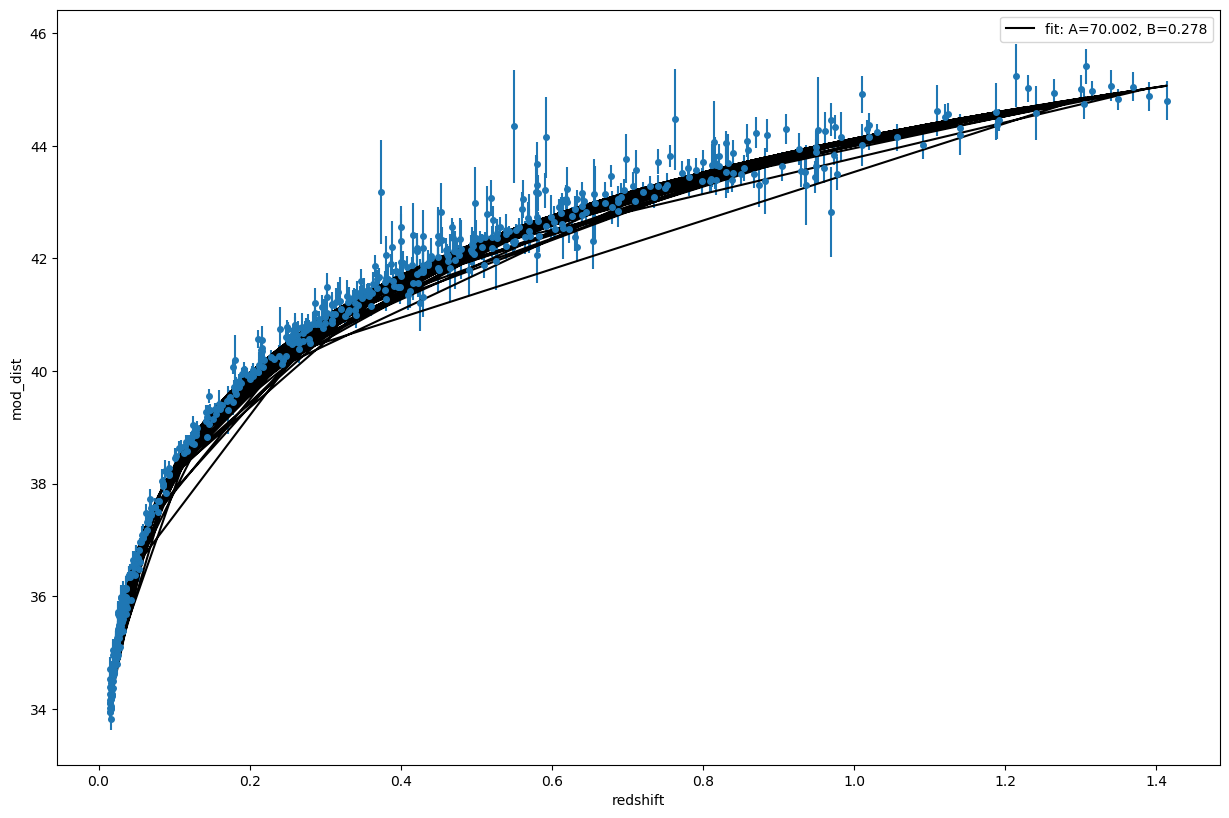

In [47]:
popt, pcov = curve_fit(model2, xdata, ydata, p0=[10,0.5], sigma=sigmas, absolute_sigma=True)
print('curve fit')
print(popt)
print(pcov)         
print("A = {:.3f}+/-{:.3f}".format(popt[0],np.sqrt(pcov[0,0])))
print("B = {:.3f}+/-{:.3f}".format(popt[1],np.sqrt(pcov[1,1])))
fig, ax = plt.subplots(figsize=(15, 10), dpi=100)
ax.errorbar(df.redshift, df.mod_dist, xerr = 0, yerr=df.mod_dist_err, marker='o', markersize=4, linestyle='')
ax.set_xlabel('redshift')
ax.set_ylabel('mod_dist')
plt.plot(xdata, model2(xdata, *popt), 'r-', label='fit: A={:5.3f}, B={:5.3f}'.format(*popt),color = 'black')
plt.legend()
plt.show()

ricordando che la somma dei parametri B e C è pari a uno si ha che:

In [12]:
C = 1 - 0.278
print("C = ",C , "+- 0.019")

C =  0.722 +- 0.019


grafico dei residui:

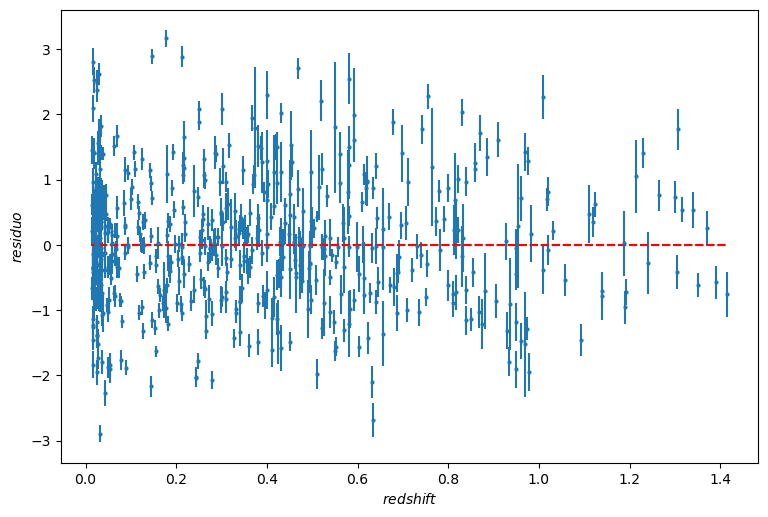

In [13]:
plt.figure(figsize=(9,6), dpi=100)
ax1=plt.subplot()
ax1.errorbar(df.redshift, ((df.mod_dist - model2(df.redshift, 70.002, 0.278))/df.mod_dist_err), xerr = 0, yerr=df.mod_dist_err, fmt="o", markersize=2)
ax1.plot(df.redshift, np.zeros(580), color = 'r', linestyle = '--' )
ax1.set_xlabel(r'$redshift$ ')
ax1.set_ylabel('$residuo$')
plt.show()

Calcolo del Chi quadro normalizzato

In [14]:
chi = 0
for i in range(580):
    chi += ((df.mod_dist[i] - model2(df.redshift[i], 70.002, 0.278))/df.mod_dist_err[i])**2
       
chi_norm = chi / (580 - 2)
print(chi_norm)

0.9727117935136316


II metodo Fit con Minuit

In [15]:
def model(z, A, B):
    return 25 + 5 * np.log10(Dl(z,A,B))

In [16]:
least_squares = LeastSquares(df.redshift, df.mod_dist, df.mod_dist_err, model)

In [20]:
m = Minuit(least_squares, A = 70, B = 0.2)

In [21]:
m.migrad()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 562.2 (chi2/ndof = 1.0)    │              Nfcn = 37               │
│ EDM = 8.01e-05 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A    │   70.01   │   0.34    │            │            │         │         │       │
│ 1 │ B    │   0.277   │   0.020   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        A        B │
├───┼───────────────────┤
│ A │    0.117 -0.00489 │
│ B │ -0.00489 0.000379 │
└───┴───────────────────┘

In [26]:
m.minos()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 562.2 (chi2/ndof = 1.0)    │             Nfcn = 2131              │
│ EDM = 8.01e-05 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A    │   70.01   │   0.34    │   -0.34    │    0.34    │         │         │       │
│ 1 │ B    │   0.277   │   0.019   │   -0.019   │   0.020    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │           A           │           B           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.34   │   0.34    │  -0.019   │   0.020   │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌───┬───────────────────┐
│   │        A        B │
├───┼───────────────────┤
│ A │    0.117 -0.00489 │
│ B │ -0.00489 0.000379 │
└───┴───────────────────┘

In [43]:
chi_2 = m.fval
print(chi_2)

562.2267062713814


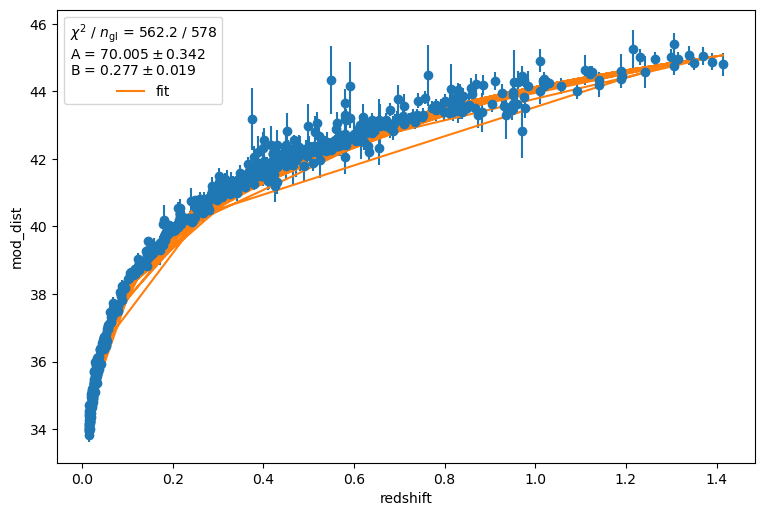

In [40]:
plt.figure(figsize=(9,6), dpi=100)
plt.errorbar(xdata, ydata,sigmas, fmt="o")
data_y_f = model(xdata, 70.01,0.277)
plt.plot(xdata, data_y_f, label="fit")
plt.xlabel('redshift')
plt.ylabel('mod_dist')
fit_info = [ f"$\\chi^2$ / $n_\\mathrm{{gl}}$ = {m.fval:.1f} / {len(xdata) - m.nfit}" ]
for p, v, e in zip(m.parameters, m.values, m.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
plt.legend(title="\n".join(fit_info))
plt.show()

grafico dei residui:

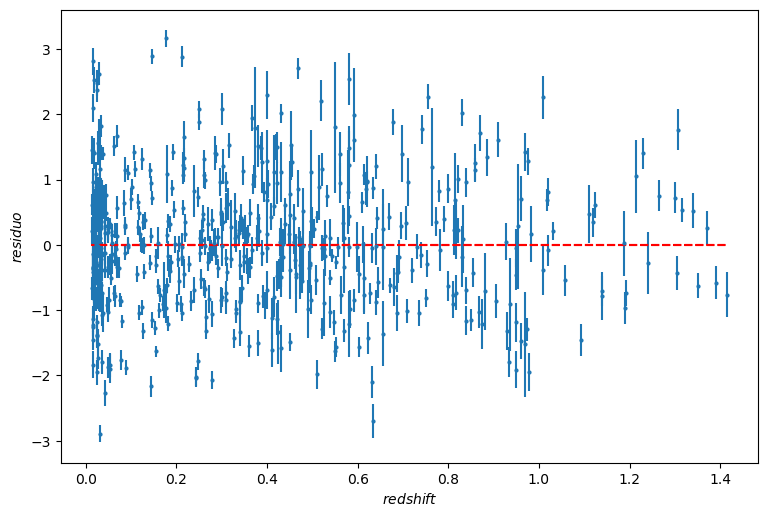

In [49]:
plt.figure(figsize=(9,6), dpi=100)
ax1=plt.subplot()
ax1.errorbar(df.redshift, ((df.mod_dist - model2(df.redshift, 70.01, 0.277))/df.mod_dist_err), xerr = 0, yerr=df.mod_dist_err, fmt="o", markersize=2)
ax1.plot(df.redshift, np.zeros(580), color = 'r', linestyle = '--' )
ax1.set_xlabel(r'$redshift$ ')
ax1.set_ylabel('$residuo$')
plt.show()

calcolo del chi-normalizzato

In [49]:
chi_2_norm = m.fval / (len(xdata) - m.nfit)
print(chi_2_norm)

0.9727105644833589


curve di confidenza dei parametri A e B.

In [22]:
m.covariance.correlation()

,A,B
A,1,-0.736
B,-0.736,1


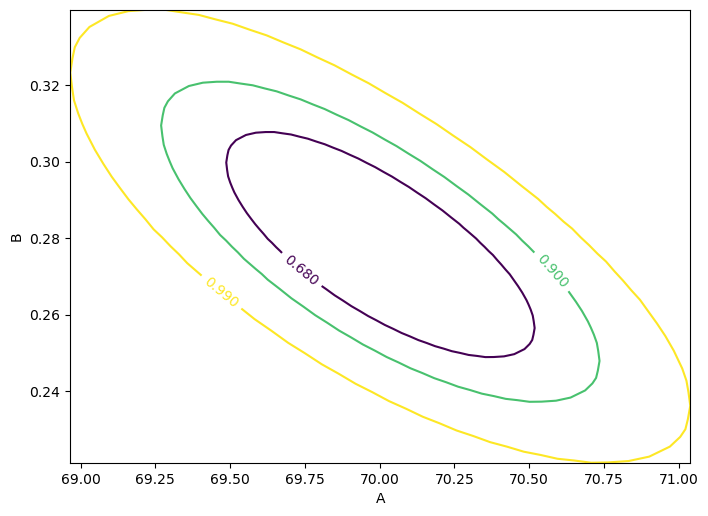

In [25]:
plt.figure(figsize=(8,6), dpi=100)
m.draw_mncontour("A", "B", cl=(0.68, 0.9, 0.99))
plt.show()